In [6]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 41.1 MB/s eta 0:00:00


In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [8]:
# 1 Domain variabel
x_temp = np.arange(35,41,0.1)
x_pulse = np.arange(60,141,1)
x_priority = np.arange(0,101,1)

In [9]:
# 2 Fungsi keanggotaan
temp_normal = fuzz.trimf(x_temp, [35, 36.5, 38])
temp_high   = fuzz.trimf(x_temp, [37, 38.5, 40])

pulse_normal = fuzz.trimf(x_pulse, [60, 80, 100])
pulse_fast   = fuzz.trimf(x_pulse, [90, 115, 140])

# Output: monoton (sesuai Tsukamoto)
priority_low  = fuzz.trimf(x_priority, [0, 0, 50])
priority_med  = fuzz.trimf(x_priority, [25, 50, 75])
priority_high = fuzz.trimf(x_priority, [50, 100, 100])

In [10]:
# 3 Input pasien
temp_in = 38.0
pulse_in = 110

In [11]:
# 4 fuzzifikasi
μ_temp_normal = fuzz.interp_membership(x_temp, temp_normal, temp_in)
μ_temp_high   = fuzz.interp_membership(x_temp, temp_high, temp_in)

μ_pulse_normal = fuzz.interp_membership(x_pulse, pulse_normal, pulse_in)
μ_pulse_fast   = fuzz.interp_membership(x_pulse, pulse_fast, pulse_in)

print(f"Derajat keanggotaan suhu: Normal={μ_temp_normal:.2f}, Tinggi={μ_temp_high:.2f}")
print(f"Derajat keanggotaan nadi: Normal={μ_pulse_normal:.2f}, Cepat={μ_pulse_fast:.2f}")


Derajat keanggotaan suhu: Normal=0.00, Tinggi=0.67
Derajat keanggotaan nadi: Normal=0.00, Cepat=0.80


In [12]:
# 5 Rule evaluation
# Rule 1: Jika suhu normal dan nadi normal → prioritas rendah
alpha1 = min(μ_temp_normal, μ_pulse_normal)

# Rule 2: Jika suhu tinggi atau nadi cepat → prioritas tinggi
alpha2 = max(μ_temp_high, μ_pulse_fast)

# Fungsi monotonik → kita cari nilai prioritas (z) dari α
z1 = 50 * (1 - alpha1)     # Prioritas rendah (menurun)
z2 = 50 + 50 * (alpha2)    # Prioritas tinggi (meningkat)

# Defuzzifikasi (rata-rata terbobot)
z = (alpha1 * z1 + alpha2 * z2) / (alpha1 + alpha2)

print("\n=== Hasil inferensi Tsukamoto ===")
print(f"α1 = {alpha1:.2f}, z1 = {z1:.2f}")
print(f"α2 = {alpha2:.2f}, z2 = {z2:.2f}")

print(f"\nOutput (z*) = {z:.2f}")


=== Hasil inferensi Tsukamoto ===
α1 = 0.00, z1 = 50.00
α2 = 0.80, z2 = 90.00

Output (z*) = 90.00


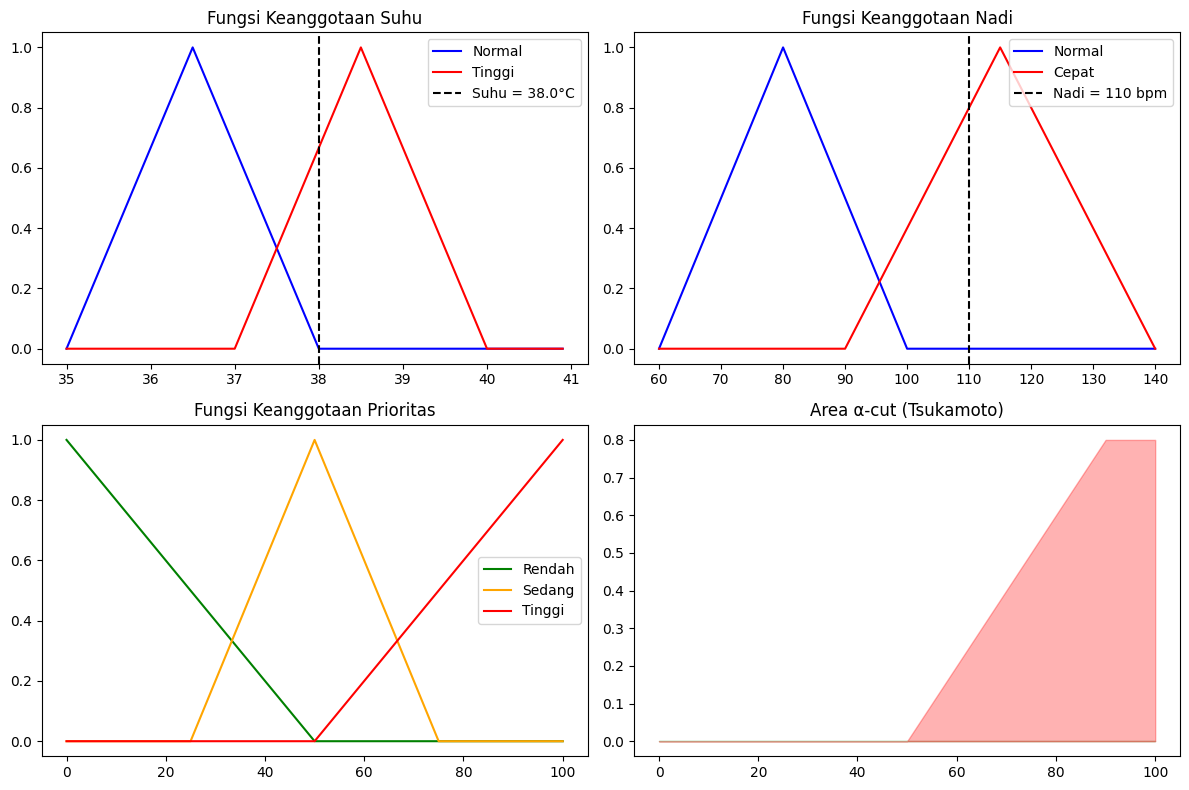

<Figure size 640x480 with 0 Axes>

In [13]:
# 6 Visualisasi
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Suhu
axs[0,0].plot(x_temp, temp_normal, 'b', label='Normal')
axs[0,0].plot(x_temp, temp_high,   'r', label='Tinggi')
axs[0,0].axvline(temp_in, color='k', linestyle='--', label=f'Suhu = {temp_in}°C')
axs[0,0].set_title('Fungsi Keanggotaan Suhu')
axs[0,0].legend()

# Nadi
axs[0,1].plot(x_pulse, pulse_normal, 'b', label='Normal')
axs[0,1].plot(x_pulse, pulse_fast,   'r', label='Cepat')
axs[0,1].axvline(pulse_in, color='k', linestyle='--', label=f'Nadi = {pulse_in} bpm')
axs[0,1].set_title('Fungsi Keanggotaan Nadi')
axs[0,1].legend()

# Output Prioritas (konsekuen)
axs[1,0].plot(x_priority, priority_low,  'g', label='Rendah')
axs[1,0].plot(x_priority, priority_med,  'orange', label='Sedang')
axs[1,0].plot(x_priority, priority_high, 'r', label='Tinggi')
axs[1,0].set_title('Fungsi Keanggotaan Prioritas')
axs[1,0].legend()

# Plot α-cut area (clipped)
axs[1,1].fill_between(x_priority, 0, np.fmin(alpha1, priority_low), color='g', alpha=0.3)
axs[1,1].fill_between(x_priority, 0, np.fmin(alpha2, priority_high), color='r', alpha=0.3)

axs[1,1].set_title('Area α-cut (Tsukamoto)')
plt.tight_layout()
plt.show()
axs[1,0].axvline(z1, color='g', linestyle='--')
axs[1,0].axvline(z2, color='r', linestyle='--')

axs[1,0].axvline(z, color='k', linestyle='--', label=f'z* = {z:.2f}')
axs[1,0].set_title('Fungsi Konsekuen dan Area α-cut')
axs[1,0].legend()

# Visualisasi hasil defuzzifikasi
axs[1,1].bar(['Rule 1', 'Rule 2'], [z1, z2], color=['g', 'r'])
axs[1,1].axvline(x=2, color='k', linestyle='--', label=f'z* = {z:.2f}')
axs[1,1].set_ylabel('Prioritas (0-100)')
axs[1,1].set_title('Nilai Crisp per Rule dan Hasil Akhir')
axs[1,1].legend()

plt.tight_layout()
plt.show()